## Content List

#### 1. Import libraries & data
#### 2. Wrangle & clean data set
- Check for Missing values, Duplicates, Extreme Values
#### 3. Explore data visually via Scatterplots
- Math & Reading Test Scores vs. Enrollment
#### 4. Hypothesis
#### 5. Linear Regression
#### 6. Interpretation & next steps
#### 7. Export Visualizations & data

## 1. Import libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# define path to csv file

path = r'/Users/jsok/US Education Analysis'

In [3]:
# define path to JSON

state_geo = r'/Users/jsok/US Education Analysis/02 Data/us-states.json'

In [4]:
# read csv file

educ = pd.read_csv(os.path.join(path,'02 Data','states_all_new3.csv'), index_col=0)

## 2. Wrangle & clean data set

In [5]:
educ.columns

Index(['State', 'Year', 'Total_Revenue', 'Total_Expenditure', 'Net',
       'Grade_PK', 'Grades_All', 'Grade_12', 'Avg_Math_4_Score',
       'Avg_Math_8_Score', 'Avg_Reading_4_Score', 'Avg_Reading_8_Score',
       'us_region'],
      dtype='object')

##### Missing data

In [6]:
# Check for null data

educ.isnull().sum()

State                     0
Year                      0
Total_Revenue           400
Total_Expenditure       400
Net                       0
Grade_PK                140
Grades_All               50
Grade_12                 50
Avg_Math_4_Score       1117
Avg_Math_8_Score       1081
Avg_Reading_4_Score    1036
Avg_Reading_8_Score    1121
us_region                 0
dtype: int64

###### Null values are part of this data set: 
- Years recorded: 1986-2019
- Financial data recorded from 1992-2016
- Enrollment data recorded from 1986-2017
- Test data recorded sparsely
- No data recorded for 2018

##### Duplicate data

In [7]:
# Check for duplicate data

dups = educ.duplicated()

In [8]:
dups.shape

# No missing values

(1646,)

##### Extreme values check

<Axes: xlabel='Grades_All', ylabel='Density'>

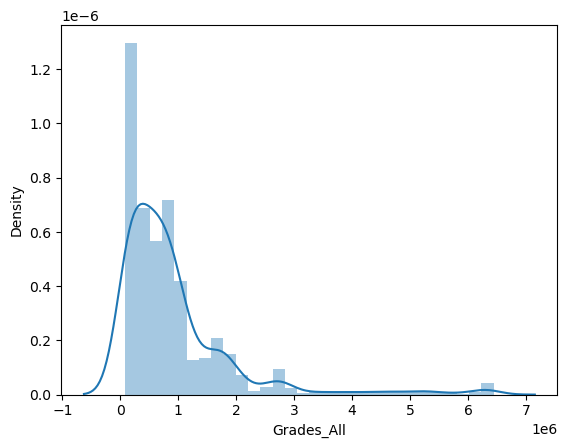

In [9]:
# check for outliers or extreme values in enrollment: 'Grades_All'

sns.distplot(educ['Grades_All'], bins=30) # Shows extreme values

In [10]:
educ['Grades_All'].describe()

count    1.596000e+03
mean     9.202809e+05
std      1.037712e+06
min      8.440900e+04
25%      2.807270e+05
50%      6.573110e+05
75%      1.046178e+06
max      6.441557e+06
Name: Grades_All, dtype: float64

<Axes: xlabel='Total_Revenue', ylabel='Density'>

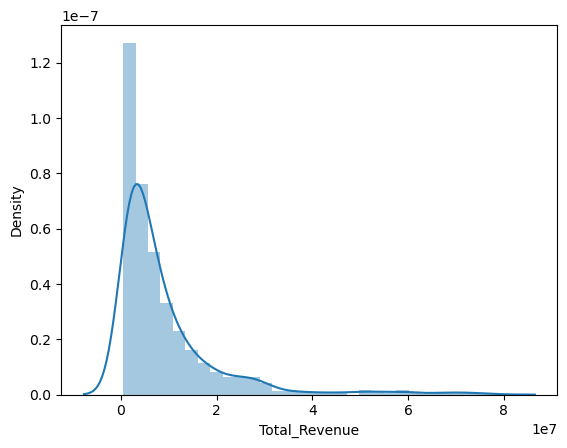

In [11]:
# check for outliers or extreme values in enrollment: 'Grades_All'

sns.distplot(educ['Total_Revenue'], bins=30) # Shows extreme values

In [12]:
educ['Total_Revenue'].describe()

count    1.246000e+03
mean     9.088810e+06
std      1.139443e+07
min      4.656500e+05
25%      2.285962e+06
50%      5.212646e+06
75%      1.097140e+07
max      7.824804e+07
Name: Total_Revenue, dtype: float64

##### Columns seem to be more right-skewed, likely due to the fact that more data was recorded for smaller schools/towns (which explains the lower total enrollment, revenue, and expenditure). 

#### Create Subsets for Years

In [13]:
# Subset for Test data
# filter for rows with non-null values in the Test score columns

math8 = educ[educ[['Avg_Math_8_Score']].notnull().all(1) & educ[['Total_Revenue']].notnull().all(1)]  
reading8 = educ[educ[['Avg_Reading_8_Score']].notnull().all(1) & educ[['Total_Revenue']].notnull().all(1)]  

## 3. Explore data visually via Scatterplot

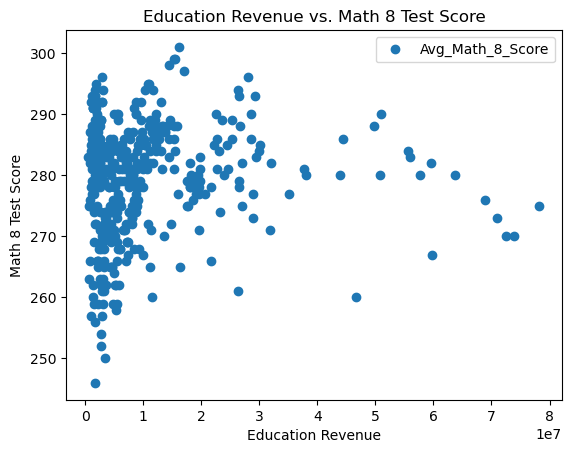

In [14]:
# Create a scatterplot for 'Total_Revenue' & 'Avg_Math_8_Score'
# Style='o' creates scatterplot

math8.plot(x = 'Total_Revenue', y='Avg_Math_8_Score',style='o') 
plt.title('Education Revenue vs. Math 8 Test Score')  
plt.xlabel('Education Revenue')  
plt.ylabel('Math 8 Test Score')  
plt.show()

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

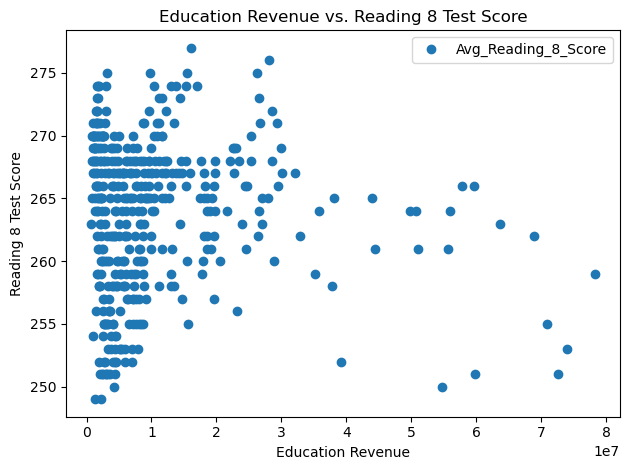

In [15]:
# Create a scatterplot for 'Total_Revenue' & 'Avg_Reading_8_Score'
# Style='o' creates scatterplot

reading8.plot(x = 'Total_Revenue', y='Avg_Reading_8_Score',style='o') 
plt.title('Education Revenue vs. Reading 8 Test Score')  
plt.xlabel('Education Revenue')  
plt.ylabel('Reading 8 Test Score')  
plt.show()

# ensure the visual image fits
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) 

## 4. Hypothesis
##### - Education Revenue has little to no effect on Test Scores.

## 5. Linear Regression

#### Total Revenue vs. Math 8 Test Score

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = math8['Total_Revenue'].values.reshape(-1,1)
y = math8['Avg_Math_8_Score'].values.reshape(-1,1)

In [17]:
# Create a regression object to be fit onto training set

regression_math8 = LinearRegression()

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Fit the regression object onto the training set.

regression_math8.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predict the values of y using X

y_predicted = regression_math8.predict(X_test)

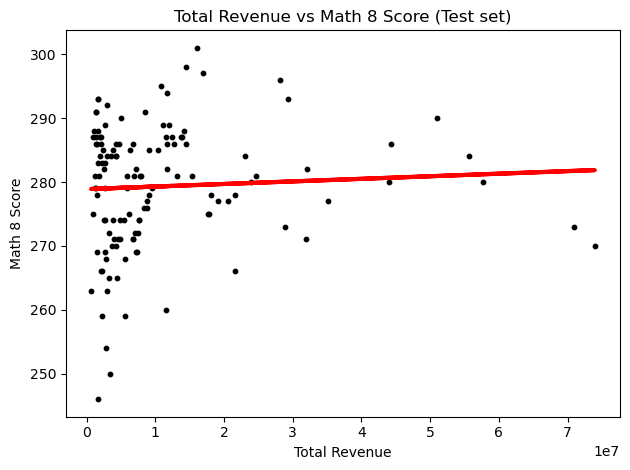

In [21]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 10)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Revenue vs Math 8 Score (Test set)')
plot_test.xlabel('Total Revenue')
plot_test.ylabel('Math 8 Score')
plot_test.show()

In [22]:
# Create objects that contain the model summary statistics.

rmse_math8 = mean_squared_error(y_test, y_predicted) # root mean squared error
r2_math8 = r2_score(y_test, y_predicted) # This is the R2 score (variance)

In [23]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_math8.coef_)
print('Mean squared error: ', rmse_math8)
print('R2 score: ', r2_math8)

Slope: [[4.02834873e-08]]
Mean squared error:  94.55473554613182
R2 score:  0.006259107498579275


#### Comparing Actual vs. Predicted y values:

In [24]:
data_math8 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_math8.head(50)

,Actual,Predicted
0,289.0,279.371830
1,263.0,279.007586
2,281.0,278.959625
3,286.0,279.467886
4,275.0,278.922038
5,287.0,278.940459
6,269.0,278.996229
7,282.0,278.989947
8,270.0,279.036610
9,284.0,278.968469


#### Total Revenue vs. Reading 8 Test Score

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

XX = reading8['Total_Revenue'].values.reshape(-1,1)
yy = reading8['Avg_Reading_8_Score'].values.reshape(-1,1)

In [26]:
# Create a regression object to be fit onto training set

regression_reading8 = LinearRegression()

In [27]:
# Split data into a training set and a test set.

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=0)

In [28]:
# Fit the regression object onto the training set.

regression_reading8.fit(XX_train, yy_train)

LinearRegression()

In [29]:
# Predict the values of yy using XX

yy_predicted = regression_reading8.predict(XX_test)

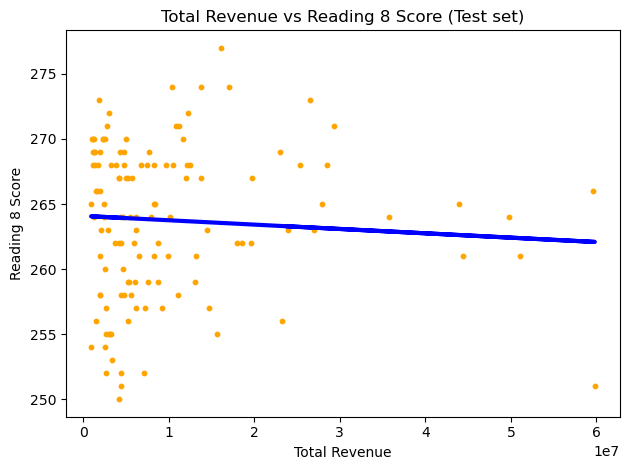

In [30]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(XX_test, yy_test, color='orange', s = 10)
plot_test.plot(XX_test, yy_predicted, color='blue', linewidth =3)
plot_test.title('Total Revenue vs Reading 8 Score (Test set)')
plot_test.xlabel('Total Revenue')
plot_test.ylabel('Reading 8 Score')
plot_test.show()

In [31]:
# Create objects that contain the model summary statistics.

rmse_reading8 = mean_squared_error(yy_test, yy_predicted) # root mean squared error
r2_reading8 = r2_score(yy_test, yy_predicted) # This is the R2 score (variance)

In [32]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression_reading8.coef_)
print('Mean squared error: ', rmse_reading8)
print('R2 score: ', r2_reading8)

Slope: [[-3.34198444e-08]]
Mean squared error:  34.553076064542054
R2 score:  -0.00648317556186373


#### Comparing Actual vs. Predicted y values:

In [33]:
data_reading8 = pd.DataFrame({'Actual': yy_test.flatten(), 'Predicted': yy_predicted.flatten()})
data_reading8.head(50)

,Actual,Predicted
0,258.0,263.925933
1,270.0,264.052381
2,255.0,263.983535
3,259.0,263.648209
4,268.0,263.977583
5,255.0,263.981274
6,268.0,264.046946
7,273.0,263.198809
8,262.0,263.482221
9,269.0,264.019184


## 6. Interpretation & next steps

### - The line of best fit is quite far from the true data values.  And while the axes scaling is drastically different, the R2 scores (Math 8: 0.006259, Reading 8: -0.006483) indicate very poor fits, as R2 is much closer to 0 than it is to 1.
### - Also, the Actual values vary considerably from the Predicted values, which is another indicator that this relationship is not ideal to include in the final analysis.
### - Some bias that could be present is definitely sample bias.  As expressed in "2. Wrangle & Clean data set," null values are present throughout because data is recorded inconsistenly, misrepresentative of the actual Education data population.  Also, the quantity of data is lobsided, with many more data points recorded below a certain Revenue threshold.  

## 7. Export Data

In [34]:
# Export csv file

educ.to_csv(os.path.join(path, '02 Data', 'states_all_new4.csv'))